## Seismic wavefield visualization and comparison
### D. Li
### 7 Feb. 2024


In [32]:
# load modulus
import numpy as np
import seissolxdmf
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt

import seaborn as sn


In [154]:
import matplotlib
from matplotlib.ticker import MultipleLocator
print(matplotlib.style.available)

# matplotlib.rc('font', **font)
matplotlib.style.use('seaborn-v0_8-paper') # Lovely plotting style
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['legend.fontsize'] = 14
# matplotlib.rcParams['xtick.direction'] = 'in'
# matplotlib.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.major.size'] = 5.0
# plt.rcParams['xtick.minor.size'] = 3.0
# plt.rcParams['ytick.major.size'] = 5.0
# plt.rcParams['ytick.minor.size'] = 3.0

# plt.rcParams['axes.linewidth'] = 1.2
# plt.rcParams['legend.handlelength'] = 3.0


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [38]:
# load seissol out put data and extract station
# load GM data and compare station-to-station


def find_surf_site(stafolder, stafile, xdmfFilename,modelname):
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    # Number of cells
    nElements = sx.ReadNElements()
    # Read time step
    dt = sx.ReadTimeStep()
    # Read number of time steps
    ndt = sx.ReadNdt()
    # load geometry array as a numpy array of shape ((nodes, 3))
    surfxyz= sx.ReadGeometry()
    # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
    # The connectivity array gives for each cell a list of vertex ids.
    connect = sx.ReadConnect()
    # horizontal comp. and vertical
    u = sx.ReadData('v1')
    v = sx.ReadData('v2')
    w = sx.ReadData('v3')
    print('(ndt,nelemenet)= ', u.shape)
    print('time interval=', dt)
    
    sitexyz = np.loadtxt(staFile)
    # coordinates convert if necessary
    # staxyz = pyproj.transform(myproj,lla,gmData.long,gmData.lat,radians=False)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    Receiver = np.array(sitexyz)
    
    # Receiver = Receiver.transpose()
    
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    FidReceiversnew =  stafolder + modelname + '/'+ 'sitemesh_xyz.txt'
    fout = open(FidReceiversnew,'w')
    fout1 = open(stafolder + modelname + '/'+'sitemesh_number.txt','w')
    
    for k in range(sitexyz[:,0].size):
        #newrec = find_nearest_vector(centers, rec)
        newrec = centers[ids[k]]
        print(k,ids[k])
        fout.write("%f %f %f\n" %(newrec[0],newrec[1],newrec[2]))
        fout1.write("%d %f\n" %(ids[k],dist[k]))

        data = np.array([u[:,ids[k]],v[:,ids[k]],w[:,ids[k]]])
        np.savetxt(stafolder + modelname + '/sta'+ str(k)+'.txt',data.transpose())
        
    fout.close()
    fout1.close()

In [47]:
# extract station output
# seissolxdmf.seissolxdmf.ReadData?

# sx = seissolxdmf.seissolxdmf(xdmfFilename)
# # Number of cells
# nElements = sx.ReadNElements()
# # Read time step
# dt = sx.ReadTimeStep()
# # Read number of time steps
# ndt = sx.ReadNdt()
# # load geometry array as a numpy array of shape ((nodes, 3))
# surfxyz= sx.ReadGeometry()
# # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
# # The connectivity array gives for each cell a list of vertex ids.
# connect = sx.ReadConnect()
# # horizontal comp. and vertical
# u = sx.ReadData('v1')
# v = sx.ReadData('v2')
# w = sx.ReadData('v3')
# print(u.shape)

# data = np.array([u[:,4],v[:,4],w[:,4]])
# print(data.shape,data.transpose().shape)

(3, 80) (80, 3)


In [39]:
# load surface data and check station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'

xdmffolder = '/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/pointsource/'
modelname = 'test2'

xdmfFilename = xdmffolder + modelname+'-surface.xdmf'

stafolder = '/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/'
stafile  = 'station_xyz.txt'

# find_surf_site(stafolder, stafile, xdmfFilename,modelname)


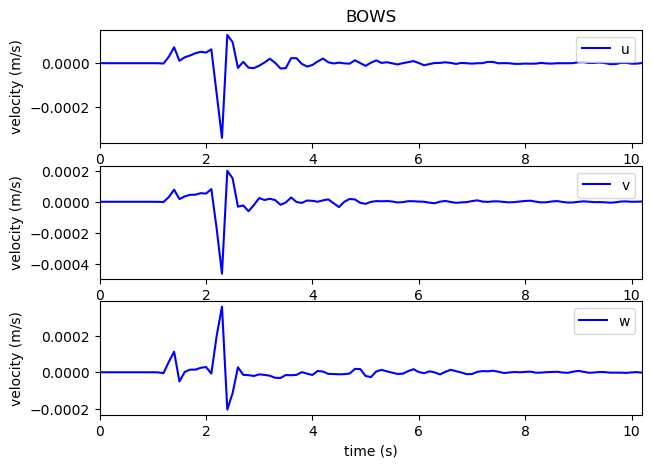

In [91]:
#site_num_file = stafolder + './sitemesh_number.txt')
# plot waveform

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'



nsite = 30

nstep = 252
dt = 0.2 # data sample rate

tt = np.linspace(0,nstep*dt-dt,nstep)


for k in range(1):
    
    fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,5))
    
    wfname = stafolder + modelname + '/sta'+ str(k)+ '.txt'
    wf = np.loadtxt(wfname)
    ax[0].plot(tt,wf[:,0],'-b',label='u')
    ax[0].legend()
    ax[0].set_title(siteTable.sta[k])
    ax[0].set_ylabel('velocity (m/s)')
    ax[0].set(xlim=(0,10.2))

    ax[1].plot(tt,wf[:,1],'-b',label='v')
    ax[1].legend()
    ax[1].set_ylabel('velocity (m/s)')
    ax[1].set(xlim=(0,10.2))

    ax[2].plot(tt,wf[:,2],'-b',label='w')
    ax[2].legend()
    ax[2].set_xlabel('time (s)')
    ax[2].set_ylabel('velocity (m/s)')
    ax[2].set(xlim=(0,10.2))
    
    plt.savefig('waveform'+str(k)+'.png',dpi=150)
    
    

10020.0


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


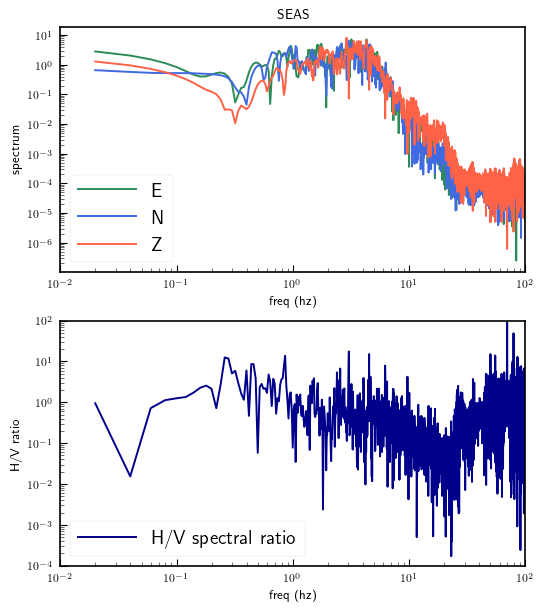

In [125]:
## plot spectrium for each station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

nsite = 30
duration = 50.1
SAMPLE_RATE = 1/0.005 # data sample rate

## data around the basin


N = duration * SAMPLE_RATE
Nt = int(np.round(N/2,1)-1)
print(N)

from scipy.fft import fft, fftfreq

folder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/'
# filename = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/test3Dv4-5hz-receiver-00020-00009.dat'
filename = folder + '/test3Dv4-5hz-receiver-00020-00009.dat'

filename = folder + 'test3Dv4-5hz-receiver-00016-00011.dat'
nsta = 16

t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
yf1 = fft(vx)
yf2 = fft(vy)
yf3 = fft(vz)
xf = fftfreq(int(N),1/SAMPLE_RATE)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
    
ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='E')
ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='N')
ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
ax[0].set(xlim=(0.01,100))
ax[0].set_xscale('log',base=10)
ax[0].set_yscale('log',base=10)
ax[0].set_title(siteTable.sta[nsta-1]) # index change
    
# plt.xlim(0,5)
ax[0].set_ylabel('spectrum')
ax[0].set_xlabel('freq (hz)')

ax[0].legend()

ax[1].plot((xf[1:Nt]), np.sqrt(yf1[1:Nt]**2 + yf2[1:Nt]**2)/np.sqrt(2)/np.abs(yf3)[1:Nt] ,'-',color='darkblue',label='H/V spectral ratio')

ax[1].set(xlim=(0.01,100),ylim=(1e-4,100))
ax[1].set_ylabel('H/V ratio')
ax[1].set_xlabel('freq (hz)')
ax[1].set_xscale('log',base=10)
ax[1].set_yscale('log',base=10)

ax[1].legend()

fftname = './FFT-'+ siteTable.sta[nsta-1]+ '.png'  # index change
plt.savefig(fftname,dpi=150)

# for k in [1,2,3,5,6]:
#     # Number of samples in normalized_tone
#     wfname = stafolder + modelname + '/'+ str(k)+ '.txt'
#     wf = np.loadtxt(wfname)
    
#     yf1 = fft(wf[:,0])
#     yf2 = fft(wf[:,1])
#     yf3 = fft(wf[:,2])
    
#     xf = fftfreq(N, 1 / SAMPLE_RATE)
    
#     plt.figure(figsize=(6,3))
    
#     plt.plot(xf[:Nt], np.abs(yf1)[:Nt],'-',color='seagreen',label='E')
#     plt.plot(xf[:Nt], np.abs(yf2)[:Nt],'-',color='royalblue',label='N')
#     plt.plot(xf[:Nt], np.abs(yf3)[:Nt],'-',color='tomato',label='Z')
#     # plt.xlim(0,5)
#     plt.ylabel('spectrum')
    
#     plt.legend()
#     fftname = stafolder + modelname + '/FFT-'+ siteTable.sta[k]+ '.png'
#     plt.savefig(fftname,dpi=150)

In [265]:
# import instaseis and dependency
import numpy as np

from obspy import read
# from obspy.taup import TauPyModel as taup
# from obspy.taup.taup_geo import calc_dist_azi as calc_dist_azi

from obspy.clients.fdsn import Client
# from obspy.signal.cross_correlation import correlate
# from obspy.signal.cross_correlation import xcorr_max


# plot regional seismic network and compare seismograph
from obspy.clients.fdsn import Client
# from obspy.geodetics import gps2dist_azimuth
from obspy import UTCDateTime
# from obspy.signal.rotate import rotate2zne

from obspy import read,read_inventory
# from obspy.signal.cross_correlation import xcorr
# from obspy.signal.rotate import rotate_ne_rt
from obspy import Trace, Stream

In [532]:
import pandas as pd

siteTable = pd.read_csv('/Users/duoli/Documents/NSHM_SRM/Model_kinematic/site_subtable2.csv')
print(siteTable['sta'])

print(siteTable.query('sta=="ARKS"').site_class)


0     ARKS
1      BHW
2     BMTS
3     BOWS
4     CUBS
5     DAVS
6     EBPS
7     FAIS
8     FKPS
9     GPSS
10    HIBS
11    HSSS
12    INSS
13    LHBS
14    LHES
15    LHRS
16    LHUS
17    LIRS
18    LNBS
19    LRSS
20    MISS
21    MKBS
22    MKVS
23     MRW
24    NBSS
25    NEWS
26     OTW
27    PFAS
28    PGMS
29    PHFS
30    PHHS
31    PIPS
32    POKS
33    POLS
34    POTS
35    PRKS
36    PTOS
37    PVCS
38    PWES
39    RQGS
40    SEAS
41    SEVS
42    SNZO
43    SOCS
44    SOMS
45    TAIS
46    TEPS
47    TFSS
48    TRTS
49    UHCS
50    VUWS
51    WANS
52    WCFS
53    WDAS
54     WEL
55    WEMS
56    WNAS
57    WNHS
58    WNKS
59    WTYS
Name: sta, dtype: object
0    C
Name: site_class, dtype: object


In [181]:
client  = Client("GEONET")

nw = ['NZ']       # network
sta= np.array(siteTable.sta) # station
ch = ['HN*']      # channel

# Event catalog
# event = cat[0]
# print(cat) 

startT = '2009-08-01 11:05:00.000'
endT = '2009-09-01 11:00:00.000'
cat = client.get_events(latitude=siteTable.lat[0],longitude=siteTable.lon[0],maxradius=0.4,minmagnitude=4.5, starttime=startT,endtime=endT) # Y
print(cat)

# cat.plot(projection="local")

1 Event(s) in Catalog:
2009-08-27T14:10:48.957000Z | -41.442, +174.709 | 4.7  Mw | manual


In [408]:
event = cat[0]
start = event.origins[0].time

# get all instrument response for Wellington Area.
# inv = client.get_stations(network='NZ',channel='HNZ',latitude=siteTable.lat[0],longitude=siteTable.lon[0],maxradius=0.3,starttime=start,endtime=end,level="response")
# print(inv)
# inv.write("inv_NZ.xml", format="STATIONXML")

# st_data = Stream()

# for network in inv:
#     for station in network:
#         try:
#             st = client.get_waveforms(network.code, station.code, "*", "HNZ", start, start + 40)
#             st.remove_response(inventory=inv.select(station=station.code),output='ACC')
#             st.detrend('simple')
#             st_data += st
#         except:
#             pass

print(st_data)
network = inv[0]
print(network)
# st.remove_response(inventory=inv,output='acc') 


32 Trace(s) in Stream:

NZ.ARKS.20.HNZ | 2009-08-27T14:10:48.955000Z - 2009-08-27T14:11:28.955000Z | 200.0 Hz, 8001 samples
...
(30 other traces)
...
NZ.WNKS.20.HNZ | 2009-08-27T14:10:48.955000Z - 2009-08-27T14:11:22.995000Z | 200.0 Hz, 6809 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
Network NZ (New Zealand National Seismograph Network)
	Station Count: 29/2148 (Selected/Total)
	1916-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (29):
			NZ.ARKS (Wainuiomata Arakura School)
			NZ.AVAB (GNS Avalon)
			NZ.CPLB (Wellington CentrePort BNZ Building)
			NZ.EBPS (Eastbourne Police Station)
			NZ.FKPS (Wellington Frank Kitts Park)
			NZ.HSSS (Lower Hutt Haywards Substation)
			NZ.INSS (Lower Hutt GNS Nuclear Sciences)
			NZ.LHBS (Lower Hutt Normandale)
			NZ.LHES (Lower Hutt Emergency Management Office)
			NZ.LHRS (Lower Hutt Normandale Rock Site)
			NZ.LHUS (Lower Hutt Unilever)
			NZ.MISS (Wellington Miramar School)
			NZ.PFAS (Porirua Free Amb

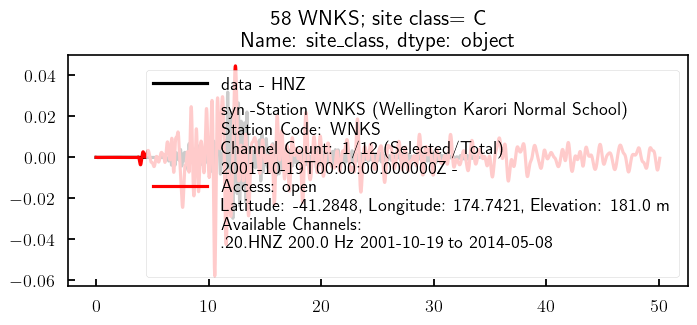

In [547]:
# example for one Single station
# sta_sele  = 'WNKS'
# st1 = st.select(station=sta_sele)
# st1.remove_response(inventory=inv.select(station=sta_sele),output='vel',plot=True) 
matplotlib.style.use('seaborn-v0_8-talk')

num = 0 # Station CHN
sta1 = 'WNKS'

df_site = siteTable.query('sta=="WNKS"')

plt.figure(figsize=(8, 3))

# max0 = st_data1.select(station = sta1, channel='HNZ')[0].data.max()
# max1 = st_syn1.select(station = sta1, channel='BNZ')[0].data.max()

ax3 = plt.subplot(111)
ax3.plot(st_data1.select(station = sta1,channel='HNZ')[0].times(),st_data1.select(station=sta1,channel='HNZ')[0].data,'k',label='data - HNZ' )
ax3.plot(st_syn0.select(station=sta1, channel = 'BNZ')[0].times(),st_syn0.select(station =sta1, channel='BNZ')[0].data,'r',label='syn -%s' %(sta))

ax3.set_title(sta1 + '; site class= ' + df_site.site_class)
ax3.legend()

outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/model2/ACClowD2/'
figout = outfolder + './ACC-'+ sta1 + '.png'  # index change

plt.savefig(figout,dpi=300)
plt.show()       

# st1.plot()

In [ ]:
rootfolder = '/Users/duoli/Documents/NSHM_SRM/'
# matplotlib.style.use('seaborn-v0_8-paper')


for network in inv:
    for sta in network:
        try:
            print(str(sta.code))
            
            # df= siteTable.query('sta==str(sta.code)')
            
            plt.figure(figsize=(8, 3))
            
            ax3 = plt.subplot(111)
            ax3.plot(st_data.select(station=sta.code,channel='HNZ')[0].times(),st_data.select(station=sta.code,channel='HNZ')[0].data,'k',label='Data-HNZ' )
            ax3.plot(st_syn0.select(station=sta.code,channel='BNZ')[0].times(),st_syn0.select(station=sta.code,channel='BNZ')[0].data,'r',label='Syn' )
            ax3.legend()
            ax3.set_title(sta.code)
            
            outfolder = rootfolder + '/Model_kinematic/model2/ACClowD2/'
            fftname = outfolder + './ACC-'+ sta.code + '.png'  # index change
            
            plt.savefig(fftname,dpi=300)
        except:
            pass

# st1.plot()

In [ ]:
## check synthetic data for comparison with real records

import os.path
from scipy.fft import fft, fftfreq

ch = ['BNE','BNN','BNZ']


# total site selected = 60
duration = 50.1

## data around the basin
SAMPLE_RATE = 1/0.005 # data sample rate
N = duration * SAMPLE_RATE
Nt = int(np.round(N/2,1)-1)
print(N)


folder = 'Model_kinematic/model2/siteRecord/'
folder = '/Volumes/AvalonPark3/model2_2hz/lowVel/'
modelname = 'm2low'

st_syn0 = Stream()

for ista in range(1,60):

    if ista < 10 :
        filename = folder + modelname + '-receiver-0000' + str(ista) + '-00000.dat'
    else:
        filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'

    if os.path.isfile(filename):
        
        t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)

        st = Stream([Trace(vx),Trace(vy),Trace(vz)])    
        
        for tr_num in range(3):
            st[tr_num].stats['sampling_rate'] = SAMPLE_RATE
            st[tr_num].stats['network'] = 'SeisSol'
            st[tr_num].stats['station'] = siteTable.sta[ista-1] 
            st[tr_num].stats['channel'] = ch[tr_num]
        st_syn0 += st

        # spetrum analys
        # yf1 = fft(vx)
        # yf2 = fft(vy)
        # yf3 = fft(vz)
        # xf = fftfreq(int(N),1/SAMPLE_RATE)

        # fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
            
        # # ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='EW')
        # # ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='NS')
        # ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
        # ax[0].set(xlim=(0.01,100))
        
        # ax[0].set_xscale('log',base=10)
        # ax[0].set_yscale('log',base=10)
        # ax[0].set_title('site: '+ siteTable.sta[ista-1]) # index change
            
        # # plt.xlim(0,5)
        # ax[0].set_ylabel('')
        # ax[0].set_xlabel('freq (hz)')
        
        # ax[0].legend()
        
        # # ax[1].plot(t,vx,'-',color='seagreen',label='EW')
        # # ax[1].plot(t,vy,'-',color='royalblue',label='NS')
        # ax[1].plot(t,vz,'-',color='tomato',label='Z')
        
        # ax[1].set(xlim=(0,40))
        # ax[1].set_ylabel('velocity (m/s)')
        # ax[1].set_xlabel('tims (s)')
    
    
        # # ax[1].legend()
        # outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/model2/'
        # fftname = outfolder + './wf-spec-'+ siteTable['sta'][ista-1] + '.png'  # index change
        # plt.savefig(fftname,dpi=150)
    else:
        pass

# filter and band of freq of the synthetic recording

# f1 = 0.1
# f2 = 5.0 
# st_syn1 = st_syn.copy()
# st_syn1.differentiate()
# st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

print(st_syn)
# real recording
# st_data1 = st_data.copy()
# st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)
            

In [523]:
# real recording
# st_data1 = st_data.copy()
# st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)
print(st_syn0)
    

177 Trace(s) in Stream:

SeisSol.ARKS..BNE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:50.095000Z | 200.0 Hz, 10020 samples
...
(175 other traces)
...
SeisSol.WNKS..BNZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:50.095000Z | 200.0 Hz, 10020 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [ ]:
# check coordinates of stations

# print(st1.spectrogram())
# data = inv.get_coordinates("NZ.LHRS.20.HNZ")
# staTable = pd.DataFrame(index=data.keys())
# print(staTable)

# for network in inv:
#     for station in network:
#         try:
#             name = network.code + '.' + station.code + '.' + str(20) + '.HNZ'
#             # print(inv.get_coordinates(name).values())
#             staTable = staTable.append(data = inv.get_coordinates(name).values(),index=inv.get_coordinates(name).keys())
#             staTable.tail()
#         except:
#             pass

# print(staTable)
# long1 = s



In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from obspy import read_inventory, read_events

# Set up a custom projection
projection = ccrs.AlbersEqualArea(
    central_longitude= 174,
    central_latitude= -41,
    standard_parallels=(-60,-30)
)

# Set up a figure
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection=projection)
ax.set_extent((150., 180., -60., -30.))

# Draw standard features
ax.gridlines()
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.BORDERS)

ax.set_title("Albers Equal Area Projection")

# Now, let's plot some data on the map
inv.plot(fig=fig, show=False)
cat.plot(fig=fig, show=False, title="", colorbar=False)

plt.show()

## Ground Motion visualization

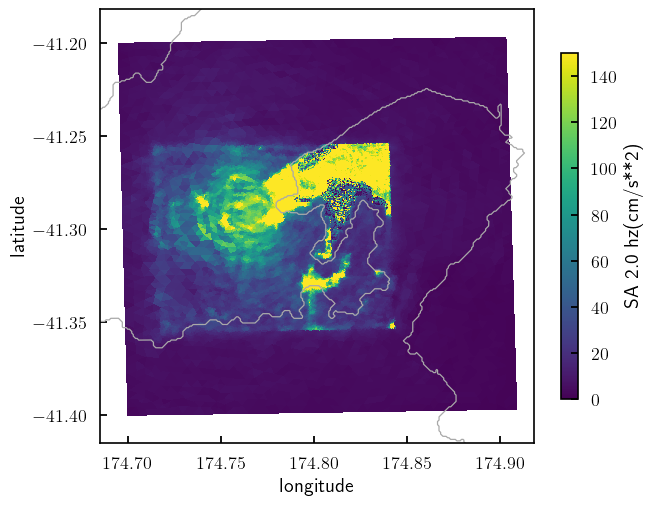

In [545]:
# print(surf[0],surf[1])
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903
ext = 0.015


fig,ax2[0] = plt.subplots(nrows=1,ncols=1,figsize=(7,6))

sc = ax2[0].tripcolor(triang,sa2*100,cmap='viridis',shading='flat',vmin = 0,vmax = 150)
cl = fig.colorbar(sc,ax=ax2[0],shrink=0.75)
cl.set_label('SA 2.0 hz(cm/s**2)')
ax2[0].plot(coast[0],coast[1],'-',color='darkgray',linewidth=0.9)
# ax2[0].plot(siteTable.lon,siteTable.lat,'^w',markersize=5.)

ax2[0].set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax2[0].set_aspect(1)
ax2[0].set_xlabel('longitude')
ax2[0].set_ylabel('latitude')

# sc = ax2[1].tripcolor(triang,pgv*100,cmap='plasma_r',shading='flat',vmin= 0.0,vmax=100)
# cl = fig.colorbar(sc,ax=ax2[1],shrink=0.75)
# cl.set_label('PGV (cm/s)')
# ax2[1].plot(coast[0],coast[1],'-k',markersize=0.1)
# ax2[1].set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))

# ax2[1].set_aspect(1)
# ax2[1].set_xlabel('longitude')
# ax2[1].set_ylabel('latitude')

outname = modelname + '-map-SA2_0.png'
plt.savefig(outname, dpi=300, transparent=False)
# plt.show()

In [137]:
# load data
modelname = '5hz'
xdmfFilename = '/Volumes/AvalonPark/GroundMotion/' + modelname + '-GME-surface.xdmf'

pga,pgv,sa1,sa2,sa4,sa8,sa0_5,triang = load_surf_gm(xdmfFilename)


(163243, 3) (392970, 3)


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/w1/_6wbwxqn58j2p6t9v4n73wcr0000gn/T/ipykernel_76679/2578218129.py:26: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)


In [136]:
## load data and plot 

import seissolxdmf
import pyproj
import matplotlib.tri as tri


coastfile ='./Geometry/CoastNorth.txt.npy'
coast =  np.load(coastfile)
# print(coast)

def load_surf_gm(xdmfFilename):
                 
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
    ndt = sx.ReadNdt()
    surfxyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    
    print(surfxyz.shape,connect.shape)
    
    # convert  # UTM projection
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
    
    surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
    
    # print(surf.shape)
    ############# load GMPEs data  ##############
    triang = tri.Triangulation(surf[0],surf[1],connect) # in longitude and latititude
    # triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in Cartesian xyz coords.
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    sa1 = sx.ReadData('SA01.000s')
    sa2 = sx.ReadData('SA00.500s')
    sa4 = sx.ReadData('SA00.250s')
    sa8 = sx.ReadData('SA00.125s')
    sa0_5 = sx.ReadData('SA02.000s')
    # sa0_2 = sx.ReadData('SA05.0000s')
    
    return pga,pgv,sa1,sa2,sa4,sa8, sa0_5, triang

# print(triang)

# surf = pyproj.transform(myproj, lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
# triang = tri.Triangulation(surf[0],surf[1],connect)


In [ ]:
# plot PGV curve vs. epicentral distance
epi1 = np.array([ 174.75, -41.3, -1.0])

stafolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/'
staIndex  = 'sitemesh_number.txt'

sIndex = np.loadtxt(stafolder+staIndex)
print(sIndex)


In [ ]:
# Basin Edge observations

matplotlib.style.use('seaborn-v0_8-pastel')

# xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
# modelname = 'test3Dv4-5hz'

nsite = 43 # receivers
duration = 30.1

## data around the basin

SAMPLE_RATE = 1/0.005 # data sample rate
N = duration * SAMPLE_RATE
Nt = int(np.round(N/2,1)-1)
print(N)

from scipy.fft import fft, fftfreq

folder = '/Volumes/AvalonPark2/test3Dv2-2hz/'
modelname = '/test3Dv2-2hz'

for ista in range(10,14):
    
    filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'
    
    t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
    yf1 = fft(vx)
    yf2 = fft(vy)
    yf3 = fft(vz)
    xf = fftfreq(int(N),1/SAMPLE_RATE)
    
    fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
        
    ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='EW')
    ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='NS')
    ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
    ax[0].set(xlim=(0.01,100))
    ax[0].set_xscale('log',base=10)
    ax[0].set_yscale('log',base=10)
    ax[0].set_title('receiver: '+ str(ista)) # index change
        
    # plt.xlim(0,5)
    ax[0].set_ylabel('Spectrum')
    ax[0].set_xlabel('freq (hz)')
    
    ax[0].legend()
    
    ax[1].plot(t,vx,'-',color='seagreen',label='EW')
    ax[1].plot(t,vy,'-',color='royalblue',label='NS')
    ax[1].plot(t,vz,'-',color='tomato',label='Z')
    
    ax[1].set(xlim=(0,30),ylim=(-0.1,0.1))
    ax[1].set_ylabel('velocity (m/s)')
    ax[1].set_xlabel('tims (s)')


    # ax[1].legend()
    outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/WelBasinRec/test3Dv2-2hz/'
    fftname = outfolder + './Topo-WF-'+ str(sta) + '.png'  # index change
    plt.savefig(fftname,dpi=150)


In [173]:
# load topographic data
from load_topo_data import load_topo_data

ncfile = '/Users/duoli/Documents/NSHM_SRM/Geometry/NZ_gebco_03s.grd'
# ncfile = '../Geometry/NZ_gebco_01s.grd'

topo, xrange,yrange = load_topo_data(ncfile)
print(topo.shape,xrange.shape)

(1746511.3065337986, 5426462.244420674)
(246, 246) (246,)


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:41: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_map = pyproj.transform(lla, myproj, x_lon,y_lat,np.zeros(len(x_lon)), radians=False)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:49: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_sou = pyproj.transform(lla, myproj, lon_sou,lat_sou, radians=False) # Epicenter in UTM domain


In [176]:
from FigFunc.load_vel_csv import load_vel_csv

In [178]:
csvfile = './basin_structure/WGTN3D_v5_VsModel_density.csv'

Nx = 40
Nz = 129

grdx,grdy,grdz, grdvel,grdrho = load_vel_csv(csvfile,Nx,Nz)

print(grdvel.shape, grdy.shape,grdz.shape)
print(grdvel.min(),grdrho.min())

Index(['X', 'Y', 'Z', 'WGTN3D_v5', 'GSURFDIST', 'Vs_CALC', 'Vs_BLOCK',
       'DENSITY'],
      dtype='object')
129 215 224
(129, 40, 40) (40,) (129,)
0.0 1.0


In [ ]:
## spectruam cal from Sanjay

def fourierspec_cal(data, dtsamp):
    ''' Gives the Fourier amplitude spectrum of a input signal.
    Parameters
    -----------------------
    data: array like
        input time signal
    dtsamp :
        sampling interval

    Returns
    freqlist: array like
        The positive signal frequencies
    fas : array like
        Positive frequency side FAS.'''
    n = len(data)
    taper = cosine_taper(n)
    sign_tap = taper*data # Tapered signal
    fft = dtsamp*fftpack.fft(sign_tap) # See the documentation of scipy.fftpack
    # Multiplication with sampling period makes it equivalent to continous Fourier transform. See Mathematica code of
    # Frank Scherbaum and fourierspec_Cal.
    freqlist = fftpack.fftfreq(n, dtsamp)
    freqs_mask = (freqlist >= 0)
    freqlist = freqlist[freqs_mask]
    fas = np.abs(fft)
    fas = fas[freqs_mask]
    return freqlist, fas

In [ ]:
def sdof_response(dat, dtsamp, fosc, dampfac=0.05):
    '''This gives the single degree of freedom oscillator response for acceleration motion.

    Parameters
    --------------------
    dat: array like
    the input acceleration data without the time samples
    dtsamp: float
    the sampling interval of the time series.
    fosc: float
    The natural frequency of the SDOF oscillator at which the response is desired.
    dampfac: float
    damping of the SDOF oscillator, its optional default is the usual 0.05.

    Returns
    ----------------------
    sa: float
    the absolute spectral amplitude or the maximum of the response motion
    times: array
    the time samples for the response motion same as for the input motion
    resp : array
    the full response motion of acceleration
    '''
    # See the mathematica version in Response Spectrum and for algorithm see the book in German.
    omegaosc = 2 * np.pi * fosc
    lamda = -dampfac * omegaosc + 1j * omegaosc * np.sqrt(1 - dampfac ** 2)
    c1 = np.exp(lamda * dtsamp)
    c2 = 2 * (1 - c1) / ((lamda - np.conj(lamda)) * dtsamp)
    y0 = 2 * lamda * (-dat[0]) / (lamda - np.conj(lamda))
    deltaai = dat[1:] - dat[:-1]     # the linear approximation of acceleration between adjacent samples.
    yi = y0
    resp = np.empty(len(dat))
    resp[0] = np.real(yi)
    for i, deltaa in enumerate(deltaai, 1):
        yi = c1 * yi + c2 * deltaa
        resp[i] = np.real(yi)        # first resp is relative motion
    resp = resp + dat                # Finally I compute total absolute movement by adding resp with input acceleration
    sa = max(np.abs(resp))
    times = np.arange(0, len(dat) * dtsamp, dtsamp, dtype=float)
    return sa, times, resp